*   Nama: Gusti Putu Wulandari
*   NIM: 20220801124

### Import library yang diperlukan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 1. Memuat dataset

In [ ]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

### 2. Melihat 5 baris pertama data

In [ ]:
print("Lima baris pertama data:")
print(data.head())

Lima baris pertama data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### 3. Memisahkan fitur dan label

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

### 4. Membagi dataset menjadi data latih dan data uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 5. Membuat model KNN dengan k=3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

### 6. Melatih model

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 7. Melakukan prediksi

In [ ]:
y_pred = knn.predict(X_test)

### 8. Menghitung akurasi

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")

Akurasi model: 100.00%


### 9. Menampilkan laporan klasifikasi

In [ ]:
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Laporan Klasifikasi:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 10. Menampilkan matriks kebingungan (confusion matrix)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriks Kebingungan:")
print(conf_matrix)


Matriks Kebingungan:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Visualisasi matriks kebingungan

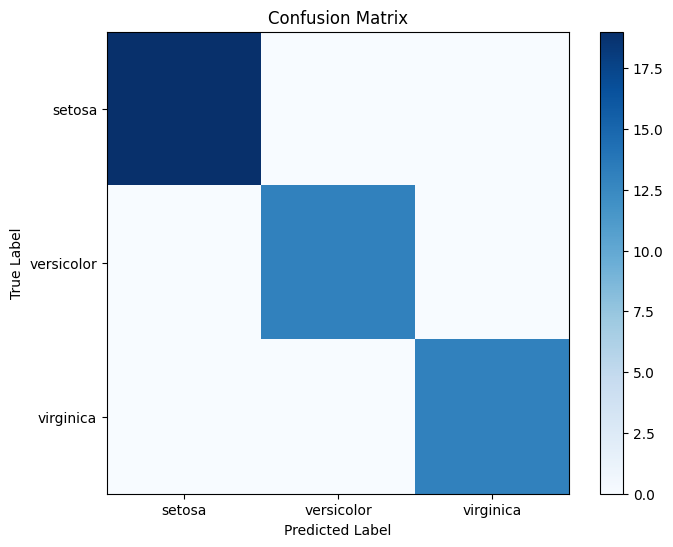

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(range(len(iris.target_names)), iris.target_names)
plt.yticks(range(len(iris.target_names)), iris.target_names)
plt.show()